# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
df = pd.read_csv('DATA/matches2020.csv')
df

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,ESPORTSTMNT03/1433741,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,5608,ESPORTSTMNT03/1433748,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,5609,ESPORTSTMNT03/1433749,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,5610,ESPORTSTMNT03/1433751,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [2]:
df.dtypes
df = df.drop(columns=["Unnamed: 0","gameid","league","blueteam","redteam"])
df.count()

bluetop        5612
bluejungle     5612
bluemid        5612
blueadc        5612
bluesupport    5612
redtop         5612
redjungle      5612
redmid         5612
redadc         5612
redsupport     5612
result         5612
dtype: int64

In [3]:
df = df.dropna()
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


### Unique Blue Teams

In [4]:

bluet = df[['bluetop','bluejungle','bluemid','blueadc','bluesupport']]
bluet

redt = df[['redtop','redjungle','redmid','redadc','redsupport']]
redt = redt.rename(columns={'redtop': 'bluetop', 'redjungle': 'bluejungle','redmid':'bluemid','redadc':'blueadc','redsupport':'bluesupport'})
allt = redt.append(bluet)
allt.groupby(['bluetop','bluejungle','bluemid','blueadc','bluesupport']).ngroups
allt

,bluetop,bluejungle,bluemid,blueadc,bluesupport
0,Aatrox,Gragas,Mordekaiser,Xayah,Rakan
1,Aatrox,Elise,Qiyana,Varus,TahmKench
2,Aatrox,Sejuani,Azir,MissFortune,Nautilus
3,Quinn,Olaf,Orianna,MissFortune,Leona
4,Renekton,Elise,Velkoz,Varus,Braum
...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux
5608,Ornn,Graves,Azir,Caitlyn,Pantheon
5609,Jayce,Sett,TwistedFate,Ashe,Bard
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon


### Unique Red Teams

In [5]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

5489

In [6]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

5489

### Unique Champions

In [7]:
topb = df['bluetop']
topr = df['redtop']
midb = df['bluemid']
midr = df['redmid']
jngb = df['bluejungle']
jngr = df['redjungle']
adcb = df['blueadc']
adcr = df['redadc']
supb = df['bluesupport']
supr = df['redsupport']
uni = df['redtop'].append(topb)
uni = uni.append(midb)
uni = uni.append(midr)
uni = uni.append(jngb)
uni = uni.append(jngr)
uni = uni.append(adcb)
uni = uni.append(adcr)
uni = uni.append(supb)
uni = uni.append(supr)
uni.nunique()
uni = uni.drop_duplicates()
uni

0           Aatrox
3            Quinn
4         Renekton
5         Vladimir
7           Irelia
           ...    
86      Blitzcrank
95         Alistar
100           Zyra
2364          Nami
1166         Brand
Length: 147, dtype: object

### Win Rate by Champion

In [8]:
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [9]:
bluewins = df.query('result == 1 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [10]:
redwins = df.query('result == 0 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [11]:
bluelosses = df.query('result == 0 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [12]:
redlosses = df.query('result == 1 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [13]:
winrate = (bluewins+redwins)/(bluelosses+redlosses)

In [14]:
champs = []
winrates = []
totalplayed = []
for item in uni:
    champs.append(item)
    bluewins = df.query('result == 1 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redwins = df.query('result == 0 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    bluelosses = df.query('result == 0 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redlosses = df.query('result == 1 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    winrate = (bluewins+redwins)/(bluelosses+redlosses+bluewins+redwins)[0]
    winrates.append(winrate[0])
    totalplayed.append((bluelosses+redlosses+bluewins+redwins)[0])
    
print(winrates, totalplayed)



[0.4769736842105263, 0.43478260869565216, 0.5274151436031331, 0.515625, 0.48905109489051096, 0.5463917525773195, 0.4823529411764706, 0.48598130841121495, 0.49937421777221525, 0.4919210053859964, 0.4672364672364672, 0.4730941704035874, 0.5758683729433273, 0.4552238805970149, 0.6666666666666666, 0.5333333333333333, 0.5535714285714286, 0.4782608695652174, 0.6153846153846154, 0.5050301810865191, 0.5069637883008357, 0.5049559471365639, 0.46601941747572817, 0.4863883847549909, 0.5064935064935064, 1.0, 0.43489254108723135, 0.5617977528089888, 0.4235294117647059, 0.4717868338557994, 0.5161290322580645, 0.45652173913043476, 0.35294117647058826, 0.5474452554744526, 0.4662309368191721, 0.5153203342618384, 0.46153846153846156, 0.4489795918367347, 0.5575221238938053, 0.5757575757575758, 0.4, 0.2222222222222222, 0.4583333333333333, 0.4, 0.5, 0.456, 0.4930555555555556, 0.4690265486725664, 0.4782608695652174, 0.4899328859060403, 0.4728682170542636, 0.5172413793103449, 0.5057232049947971, 0.38709677419

In [15]:
ch_wr_gp = (champs, winrates, totalplayed)
d = {'champ': champs, 'winrate': winrates, 'totalplayed':totalplayed}
new = pd.DataFrame(data=d)
new = new.sort_values('totalplayed')

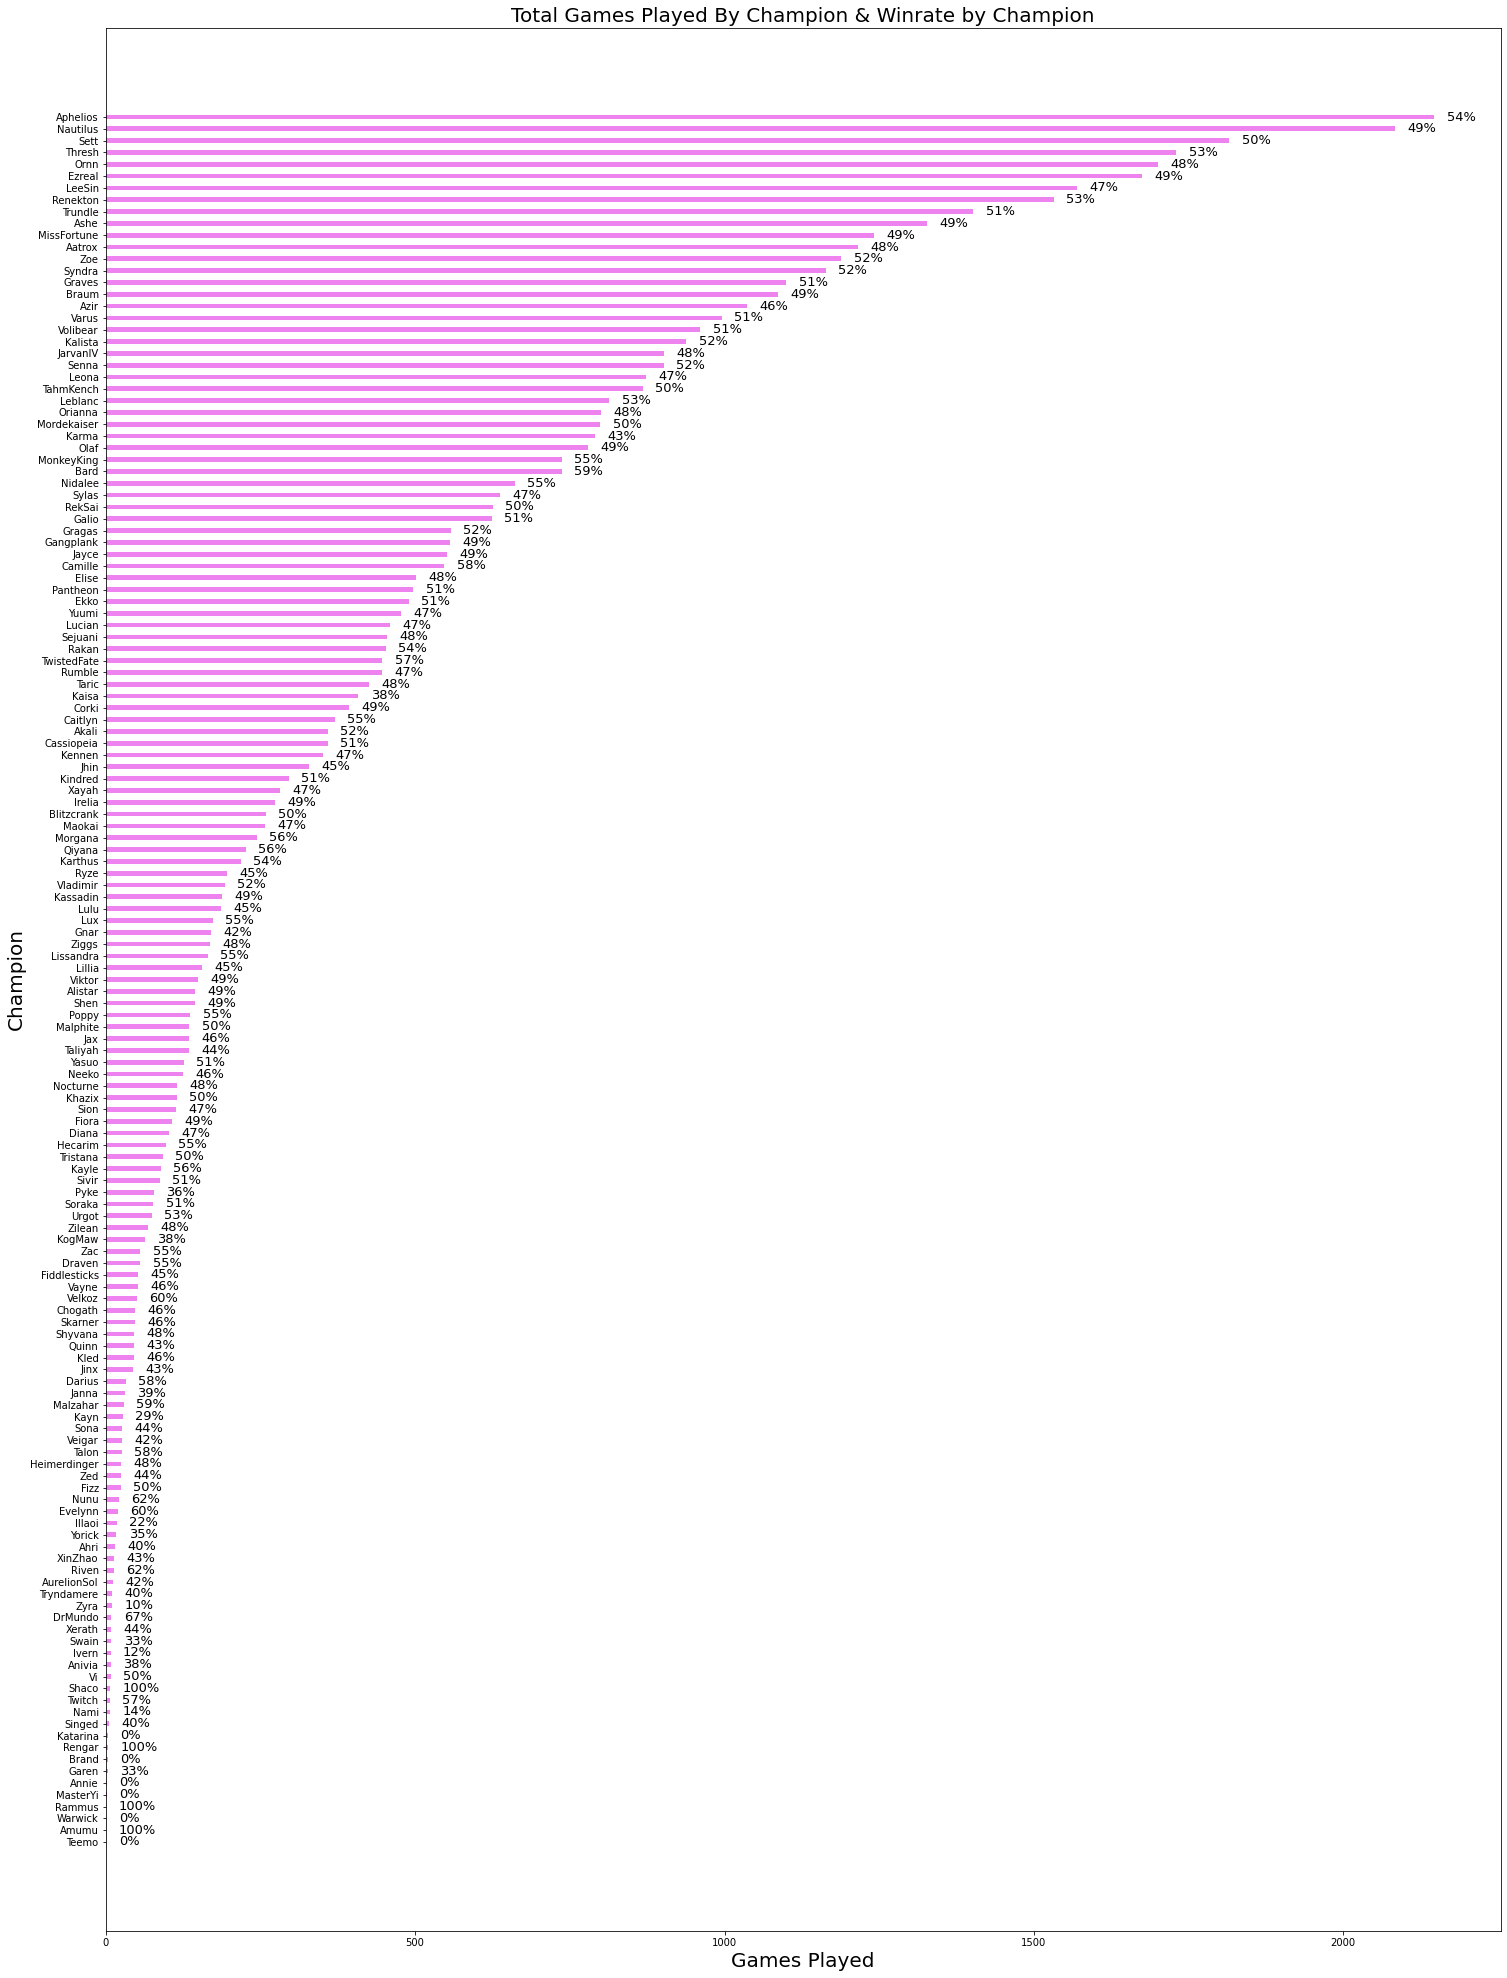

In [16]:


ind = np.arange(len(new['champ']))  # the x locations for the groups
width = .4  # the width of the bars

plt.figure(figsize=(25,35))
plt.barh(ind, new['totalplayed'], width,
                color='violet', label='Games Played')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Champion', size=20)
plt.xlabel('Games Played', size=20)
plt.title('Total Games Played By Champion & Winrate by Champion', size=20)
plt.yticks(ind, new['champ'])

for i, (p, pr) in enumerate(zip(new["winrate"], new["totalplayed"])):
    plt.text(s=('%.0f' % (p*100))+'%', x=(pr+20), y=i, color="black", verticalalignment="center", size=13)
    #plt.text(s=str(round(pr,0))+"%", x=pr-5, y=i, color="black",
             #verticalalignment="center", horizontalalignment="left", size=10)

plt.show()

### One Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
df.insert(0, 'bt_class', 'NA')
df.insert(0, 'bt_subclass', 'NA')
df.insert(0, 'rt_class', 'NA')
df.insert(0, 'rt_subclass', 'NA')
df.insert(0, 'bm_class', 'NA')
df.insert(0, 'bm_subclass', 'NA')
df.insert(0, 'rm_class', 'NA')
df.insert(0, 'rm_subclass', 'NA')
df.insert(0, 'bj_class', 'NA')
df.insert(0, 'bj_subclass', 'NA')
df.insert(0, 'rj_class', 'NA')
df.insert(0, 'rj_subclass', 'NA')
df.insert(0, 'bb_class', 'NA')
df.insert(0, 'bb_subclass', 'NA')
df.insert(0, 'rb_class', 'NA')
df.insert(0, 'rb_subclass', 'NA')
df.insert(0, 'bs_class', 'NA')
df.insert(0, 'bs_subclass', 'NA')
df.insert(0, 'rs_class', 'NA')
df.insert(0, 'rs_subclass', 'NA')

for col in df:
    if (col != 'result' and col != 'bt_class' and
       col != 'bt_subclass' and col != 'rt_class' and 
        col != 'rt_subclass' and col != 'result' and 
        col != 'bm_subclass' and col != 'bm_class' and 
        col != 'rm_subclass' and col != 'rm_class' and 
        col != 'bj_subclass' and col != 'bj_class' and 
        col != 'rj_subclass' and col != 'rj_class' and 
        col != 'bb_subclass' and col != 'bb_class' and 
        col != 'rb_subclass' and col != 'rb_class' and 
        col != 'bs_subclass' and col != 'bs_class' and 
        col != 'rs_subclass' and col != 'rs_class'):
            
        for i in range(len(df['bluetop'])):  
            if(df[col][i] == 'Bard' or df[col][i] == "Morgana" or
              df[col][i] == "Blitzcrank" or df[col][i] == "Neeko" or
              df[col][i] == "Ivern" or df[col][i] == 'Rakan' or
              df[col][i] == "Jhin" or df[col][i] == "Thresh" or
              df[col][i] == "Lux" or df[col][i] == "Zyra"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Controller"
                    df.at[i, "bt_subclass"] = "Catcher"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Controller"
                    df.at[i, "bm_subclass"] = "Catcher"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Controller"
                    df.at[i, "bj_subclass"] = "Catcher"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Controller"
                    df.at[i, "bb_subclass"] = "Catcher"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Controller"
                    df.at[i, "bs_subclass"] = "Catcher"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Controller"
                    df.at[i, "rt_subclass"]= "Catcher"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Controller"
                    df.at[i, "rm_subclass"] = "Catcher"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Controller"
                    df.at[i, "rj_subclass"] = "Catcher"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Controller"
                    df.at[i, "rb_subclass"] = "Catcher"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Controller"
                    df.at[i, "rs_subclass"] = "Catcher"
            
            
                
            elif(df[col][i] == "Janna" or df[col][i] == "Seraphine" or
              df[col][i] == "Karma" or df[col][i] == "Sona" or
              df[col][i] == "Lulu" or df[col][i] == "Soraka" or
              df[col][i] == "Nami" or df[col][i] == "Taric" or
              df[col][i] == "Senna" or df[col][i] == "Yuumi"):
                if col == 'bluetop':
                    df.at[i, "bt_class"]= "Controller"
                    df.at[i, "bt_subclass"] = "Enchanter"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Controller"
                    df.at[i, "bm_subclass"] = "Enchanter"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Controller"
                    df.at[i, "bj_subclass"] = "Enchanter"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Controller"
                    df.at[i, "bb_subclass"] = "Enchanter"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Controller"
                    df.at[i, "bs_subclass"] = "Enchanter"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Controller"
                    df.at[i, "rt_subclass"] = "Enchanter"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Controller"
                    df.at[i, "rm_subclass"]= "Enchanter"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Controller"
                    df.at[i, "rj_subclass"] = "Enchanter"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Controller"
                    df.at[i, "rb_subclass"] = "Enchanter"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Controller"
                    df.at[i, "rs_subclass"] = "Enchanter"
                
            elif(df[col][i] == "Camille" or df[col][i] == "Pantheon" or
              df[col][i] == "Diana" or df[col][i] == "RekSai" or
              df[col][i] == "Elise" or df[col][i] == "Renekton" or
              df[col][i] == "Hecarim" or df[col][i] == "Rengar" or
              df[col][i] == "Irelia" or df[col][i] == "Skarner" or
              df[col][i] == "JarvanIV" or df[col][i] == "Vi" or
              df[col][i] == "Keyn" or df[col][i] == "Warwick" or
              df[col][i] == "Kled" or df[col][i] == "MonkeyKing" or
              df[col][i] == "LeeSin" or df[col][i] == "XinZhao" or
              df[col][i] == "Olaf"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Fighter"
                    df.at[i, "bt_subclass"] = "Diver"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Fighter"
                    df.at[i, "bm_subclass"] = "Diver"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Fighter"
                    df.at[i, "bj_subclass"] = "Diver"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Fighter"
                    df.at[i, "bb_subclass"] = "Diver"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Fighter"
                    df.at[i, "bs_subclass"] = "Diver"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Fighter"
                    df.at[i, "rt_subclass"] = "Diver"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Fighter"
                    df.at[i, "rm_subclass"] = "Diver"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Fighter"
                    df.at[i, "rj_subclass"] = "Diver"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Fighter"
                    df.at[i, "rb_subclass"] = "Diver"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Fighter"
                    df.at[i, "rs_subclass"]= "Diver"
            
            elif(df[col][i] == "Aatrox" or df[col][i] == "Sett" or
              df[col][i] == "Darius" or df[col][i] == "Shyvana" or
              df[col][i] == "DrMundo" or df[col][i] == "Trundle" or
              df[col][i] == "Garen" or df[col][i] == "Udyr" or
              df[col][i] == "Illaoi" or df[col][i] == "Urgot" or
              df[col][i] == "Mordekaiser" or df[col][i] == "Volibear" or
              df[col][i] == "Nasus" or df[col][i] == "Yorick"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Fighter"
                    df.at[i, "bt_subclass"] = "Juggernaut"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Fighter"
                    df.at[i, "bm_subclass"] = "Juggernaut"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Fighter"
                    df.at[i, "bj_subclass"] = "Juggernaut"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Fighter"
                    df.at[i, "bb_subclass"] = "Juggernaut"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Fighter"
                    df.at[i, "bs_subclass"] = "Juggernaut"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Fighter"
                    df.at[i, "rt_subclass"] = "Juggernaut"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Fighter"
                    df.at[i, "rm_subclass"] = "Juggernaut"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Fighter"
                    df.at[i, "rj_subclass"] = "Juggernaut"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Fighter"
                    df.at[i, "rb_subclass"] = "Juggernaut"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Fighter"
                    df.at[i, "rs_subclass"] = "Juggernaut"
            
            elif(df[col][i] == "Jayce" or df[col][i] == "Xerath" or
              df[col][i] == "Lux" or df[col][i] == "Ziggs" or
              df[col][i] == "Varus" or df[col][i] == "Zoe" or
              df[col][i] == "Velkoz"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Artillery"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Artillery"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Artillery"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Artillery"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Artillery"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Artillery"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Artillery"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Artillery"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Mage"
                    df.at[i, "rb_subclass"] = "Artillery"
                elif col == 'redsupport':
                    df.at[i, "rs_class"]= "Mage"
                    df.at[i, "rs_subclass"] = "Artillery"
                    
            elif(df[col][i] == "Anivia" or df[col][i] == "Rumble" or
              df[col][i] == "AurelionSol" or df[col][i] == "Ryze" or
              df[col][i] == "Cassiopeia" or df[col][i] == "Swain" or
              df[col][i] == "Karthus" or df[col][i] == "Taliyah" or
              df[col][i] == "Malzahar" or df[col][i] == "Viktor" or
              df[col][i] == "Vladimir"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Battlemage"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Battlemage"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Battlemage"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Battlemage"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Battlemage"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Battlemage"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Battlemage"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Battlemage"
                elif col == 'redadc':
                    df.at[i, "rb_class"]= "Mage"
                    df.at[i, "rb_subclass"] = "Battlemage"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Mage"
                    df.at[i, "rs_subclass"] = "Battlemage"
                    
            elif(df[col][i] == "Ahri" or df[col][i] == "Lux" or
              df[col][i] == "Annie" or df[col][i] == "Orianna" or
              df[col][i] == "Brand" or df[col][i] == "Sylas" or
              df[col][i] == "Karma" or df[col][i] == "Syndra" or
              df[col][i] == "Leblanc" or df[col][i] == "TwistedFate" or
              df[col][i] == "Lissandra"  or df[col][i] == "Veigar" or
              df[col][i] == "Lux"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Burst"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Burst"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Burst"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Burst"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Burst"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Burst"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Burst"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Burst"
                elif col == 'redadc':
                    df.at[i, "rb_class"]= "Mage"
                    df.at[i, "rb_subclass"] = "Burst"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Mage"
                    df.at[i, "rs_subclass"] = "Burst"
                    
            elif(df[col][i] == "Aphelios" or df[col][i] == "KogMaw" or
              df[col][i] == "Ashe" or df[col][i] == "Lucian" or
              df[col][i] == "Caitlyn" or df[col][i] == "MissFortune" or
              df[col][i] == "Corki" or df[col][i] == "Quinn" or
              df[col][i] == "Draven" or df[col][i] == "Senna" or
              df[col][i] == "Ezreal" or df[col][i] == "Sivir" or
              df[col][i] == "Jhin" or df[col][i] == "Tristana" or
              df[col][i] == "Jinx" or df[col][i] == "Twitch" or
              df[col][i] == "Kaisa" or df[col][i] == "Vayne" or
              df[col][i] == "Kalista" or df[col][i] == "Xayah" or
              df[col][i] == "Kindred" or df[col][i] == "Varus"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Marksman"
                    df.at[i, "bt_subclass"] = "A"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Marksman"
                    df.at[i, "bm_subclass"] = "A"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Marksman"
                    df.at[i, "bj_subclass"] = "A"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Marksman"
                    df.at[i, "bb_subclass"] = "A"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Marksman"
                    df.at[i, "bs_subclass"] = "A"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Marksman"
                    df.at[i, "rt_subclass"]= "A"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Marksman"
                    df.at[i, "rm_subclass"] = "A"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Marksman"
                    df.at[i, "rj_subclass"] = "A"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Marksman"
                    df.at[i, "rb_subclass"] = "A"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Marksman"
                    df.at[i, "rs_subclass"] = "A"
                    
            elif(df[col][i] == "Akali" or df[col][i] == "Talon" or
              df[col][i] == "Ekko" or df[col][i] == "Yone" or
              df[col][i] == "Evelynn" or df[col][i] == "Zed" or
              df[col][i] == "Fizz" or df[col][i] == "Leblanc" or
              df[col][i] == "Kassadin" or df[col][i] == "Kayn" or
              df[col][i] == "Katarina" or
              df[col][i] == "Khazix"  or
              df[col][i] == "Nocturne"  or
              df[col][i] == "Pyke"  or
              df[col][i] == "Qiyana"  or
              df[col][i] == "Shaco"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Slayer"
                    df.at[i, "bt_subclass"] = "Assassin"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Slayer"
                    df.at[i, "bm_subclass"] = "Assassin"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Slayer"
                    df.at[i, "bj_subclass"] = "Assassin"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Slayer"
                    df.at[i, "bb_subclass"] = "Assassin"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Slayer"
                    df.at[i, "bs_subclass"] = "Assassin"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Slayer"
                    df.at[i, "rt_subclass"] = "Assassin"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Slayer"
                    df.at[i, "rm_subclass"] = "Assassin"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Slayer"
                    df.at[i, "rj_subclass"] = "Assassin"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Slayer"
                    df.at[i, "rb_subclass"] = "Assassin"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Slayer"
                    df.at[i, "rs_subclass"] = "Assassin"
                    
                    
            elif(df[col][i] == "Fiora" or df[col][i] == "Tryndamere" or
              df[col][i] == "Jax" or df[col][i] == "Yasuo" or
              df[col][i] == "Lillia" or 
              df[col][i] == "MasterYi" or
              df[col][i] == "Riven"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Slayer"
                    df.at[i, "bt_subclass"] = "Skirmisher"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Slayer"
                    df.at[i, "bm_subclass"] = "Skirmisher"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"]= "Slayer"
                    df.at[i, "bj_subclass"] = "Skirmisher"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Slayer"
                    df.at[i, "bb_subclass"] = "Skirmisher"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Slayer"
                    df.at[i, "bs_subclass"] = "Skirmisher"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Slayer"
                    df.at[i, "rt_subclass"] = "Skirmisher"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Slayer"
                    df.at[i, "rm_subclass"] = "Skirmisher"
                elif col == 'redjungle':
                    df.at[i, "rj_class"]= "Slayer"
                    df.at[i, "rj_subclass"] = "Skirmisher"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Slayer"
                    df.at[i, "rb_subclass"]= "Skirmisher"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Slayer"
                    df.at[i, "rs_subclass"] = "Skirmisher"
                    
            elif(df[col][i] == "Alistar" or df[col][i] == "Nautilus" or
              df[col][i] == "Amumu" or df[col][i] == "Sion" or
              df[col][i] == "Gnar" or df[col][i] == "Zac" or
              df[col][i] == "Gragas" or
              df[col][i] == "Leona" or
              df[col][i] == "Malphite" or
              df[col][i] == "Maokai"  or
              df[col][i] == "Nunu"  or
              df[col][i] == "Ornn"  or
              df[col][i] == "Rammus"  or
              df[col][i] == "Sejuani"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Tank"
                    df.at[i, "bt_subclass"] = "Vanguard"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Tank"
                    df.at[i, "bm_subclass"] = "Vanguard"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Tank"
                    df.at[i, "bj_subclass"]= "Vanguard"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Tank"
                    df.at[i, "bb_subclass"] = "Vanguard"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Tank"
                    df.at[i, "bs_subclass"] = "Vanguard"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Tank"
                    df.at[i, "rt_subclass"] = "Vanguard"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Tank"
                    df.at[i, "rm_subclass"] = "Vanguard"
                elif col == 'redjungle':
                    df.at[i, "rj_class"]= "Tank"
                    df.at[i, "rj_subclass"] = "Vanguard"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Tank"
                    df.at[i, "rb_subclass"] = "Vanguard"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Tank"
                    df.at[i, "rs_subclass"] = "Vanguard"
                    
            elif(df[col][i] == "Braum" or df[col][i] == "Shen" or
              df[col][i] == "Chogath" or df[col][i] == "TahmKench" or
              df[col][i] == "Galio" or df[col][i] == "Taric" or
              df[col][i] == "Poppy"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Tank"
                    df.at[i, "bt_subclass"] = "Warden"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Tank"
                    df.at[i, "bm_subclass"] = "Warden"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Tank"
                    df.at[i, "bj_subclass"] = "Warden"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Tank"
                    df.at[i, "bb_subclass"] = "Warden"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"]= "Tank"
                    df.at[i, "bs_subclass"] = "Warden"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Tank"
                    df.at[i, "rt_subclass"] = "Warden"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Tank"
                    df.at[i, "rm_subclass"]= "Warden"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Tank"
                    df.at[i, "rj_subclass"] = "Warden"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Tank"
                    df.at[i, "rb_subclass"] = "Warden"
                elif col == 'redsupport':
                    df.at[i, "rs_class"]= "Tank"
                    df.at[i, "rs_subclass"] = "Warden"
                    
            elif(df[col][i] == "Azir" or
              df[col][i] == "Fiddlesticks" or
              df[col][i] == "Gangplank" or
              df[col][i] == "Graves" or
              df[col][i] == "Heimerdinger" or
              df[col][i] == "Kayle" or
              df[col][i] == "Kennen" or 
              df[col][i] == "Nidalee" or
              df[col][i] == "Singed" or
              df[col][i] == "Teemo" or
              df[col][i] == "Zilean"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Specialist"
                    df.at[i, "bt_subclass"] = "B"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Specialist"
                    df.at[i, "bm_subclass"] = "B"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Specialist"
                    df.at[i, "bj_subclass"] = "B"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Specialist"
                    df.at[i, "bb_subclass"] = "B"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Specialist"
                    df.at[i, "bs_subclass"] = "B"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Specialist"
                    df.at[i, "rt_subclass"] = "B"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Specialist"
                    df.at[i, "rm_subclass"] = "B"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Specialist"
                    df.at[i, "rj_subclass"] = "B"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Specialist"
                    df.at[i, "rb_subclass"] = "B"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Specialist"
                    df.at[i, "rs_subclass"] = "B"
                    
                    

In [19]:
df

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Catcher,Controller,Vanguard,Tank,A,Marksman,A,Marksman,Vanguard,Tank,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Warden,Tank,Vanguard,Tank,Artillery,Mage,A,Marksman,Diver,Fighter,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Vanguard,Tank,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Diver,Fighter,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Warden,Tank,Catcher,Controller,Artillery,Mage,A,Marksman,Diver,Fighter,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,Enchanter,Controller,Catcher,Controller,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Catcher,Controller,Diver,Fighter,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Vanguard,Tank,Catcher,Controller,Enchanter,Controller,A,Marksman,Diver,Fighter,...,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Catcher,Controller,Diver,Fighter,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Drop Champions

In [20]:
df = df.drop(axis=1,labels=['bluetop','redtop','bluejungle','redjungle','bluemid','redmid','blueadc','redadc','bluesupport','redsupport'])
df

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bj_class,rm_subclass,rm_class,bm_subclass,bm_class,rt_subclass,rt_class,bt_subclass,bt_class,result
0,Catcher,Controller,Vanguard,Tank,A,Marksman,A,Marksman,Vanguard,Tank,...,Fighter,Juggernaut,Fighter,Assassin,Slayer,Juggernaut,Fighter,Battlemage,Mage,1
1,Warden,Tank,Vanguard,Tank,Artillery,Mage,A,Marksman,Diver,Fighter,...,Fighter,Assassin,Slayer,Burst,Mage,Juggernaut,Fighter,Artillery,Mage,0
2,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Vanguard,Tank,...,Fighter,B,Specialist,Juggernaut,Fighter,Juggernaut,Fighter,Diver,Fighter,1
3,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Diver,Fighter,...,Fighter,Burst,Mage,Vanguard,Tank,A,Marksman,Diver,Fighter,0
4,Warden,Tank,Catcher,Controller,Artillery,Mage,A,Marksman,Diver,Fighter,...,Fighter,Artillery,Mage,Battlemage,Mage,Diver,Fighter,Juggernaut,Fighter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,Enchanter,Controller,Catcher,Controller,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Specialist,B,Specialist,Battlemage,Mage,Diver,Fighter,Vanguard,Tank,0
5608,Catcher,Controller,Diver,Fighter,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Specialist,Burst,Mage,B,Specialist,Skirmisher,Slayer,Vanguard,Tank,0
5609,Vanguard,Tank,Catcher,Controller,Enchanter,Controller,A,Marksman,Diver,Fighter,...,Fighter,Burst,Mage,Burst,Mage,B,Specialist,Artillery,Mage,0
5610,Catcher,Controller,Diver,Fighter,A,Marksman,A,Marksman,Juggernaut,Fighter,...,Fighter,Burst,Mage,B,Specialist,Artillery,Mage,Vanguard,Tank,1


In [22]:
import tensorflow as tf
num_champions=150
champs_ = []
dic = {}
j=1
for col in df:
    if col != 'result':
        print(col)
        for i in range(len(df['rs_subclass'])):
            if(df[col][i] not in champs_):
                champs_.append(df[col][i])
                dic[df[col][i]] = j
                j = j + 1
                #print(df[col][i], j)
            

print(champs_)

rs_subclass
rs_class
bs_subclass
bs_class
rb_subclass
rb_class
bb_subclass
bb_class
rj_subclass
rj_class
bj_subclass
bj_class
rm_subclass
rm_class
bm_subclass
bm_class
rt_subclass
rt_class
bt_subclass
bt_class
['Catcher', 'Warden', 'Vanguard', 'B', 'Enchanter', 'Diver', 'Battlemage', 'Assassin', 'Juggernaut', 'Burst', 'Artillery', 'A', 'Skirmisher', 'Controller', 'Tank', 'Specialist', 'Fighter', 'Mage', 'Slayer', 'Marksman']


In [23]:
dic

{'Catcher': 1,
 'Warden': 2,
 'Vanguard': 3,
 'B': 4,
 'Enchanter': 5,
 'Diver': 6,
 'Battlemage': 7,
 'Assassin': 8,
 'Juggernaut': 9,
 'Burst': 10,
 'Artillery': 11,
 'A': 12,
 'Skirmisher': 13,
 'Controller': 14,
 'Tank': 15,
 'Specialist': 16,
 'Fighter': 17,
 'Mage': 18,
 'Slayer': 19,
 'Marksman': 20}

In [25]:

for col in df:
    if col != 'result':
        for i in range(len(df['rs_subclass'])):
            #print(df[col][i])
            df[col][i] = dic[df[col][i]]
            
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bj_class,rm_subclass,rm_class,bm_subclass,bm_class,rt_subclass,rt_class,bt_subclass,bt_class,result
0,1,14,3,15,12,20,12,20,3,15,...,17,9,17,8,19,9,17,7,18,1
1,2,15,3,15,11,18,12,20,6,17,...,17,8,19,10,18,9,17,11,18,0
2,3,15,1,14,12,20,12,20,3,15,...,17,4,16,9,17,9,17,6,17,1
3,3,15,1,14,12,20,12,20,6,17,...,17,10,18,3,15,12,20,6,17,0
4,2,15,1,14,11,18,12,20,6,17,...,17,11,18,7,18,6,17,9,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5,14,1,14,12,20,12,20,9,17,...,16,4,16,7,18,6,17,3,15,0
5608,1,14,6,17,12,20,12,20,9,17,...,16,10,18,4,16,13,19,3,15,0
5609,3,15,1,14,5,14,12,20,6,17,...,17,10,18,10,18,4,16,11,18,0
5610,1,14,6,17,12,20,12,20,9,17,...,17,10,18,4,16,11,18,3,15,1


In [26]:
X = df

### Randomize SHuffle

In [27]:
X=X.sample(frac=1)
X

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bj_class,rm_subclass,rm_class,bm_subclass,bm_class,rt_subclass,rt_class,bt_subclass,bt_class,result
246,2,15,1,14,5,14,12,20,6,17,...,17,9,17,10,18,3,15,5,14,1
768,3,15,5,14,12,20,12,20,6,17,...,17,4,16,9,17,2,15,10,18,1
3531,1,14,3,15,12,20,12,20,6,17,...,17,4,16,4,16,9,17,4,16,1
1375,3,15,1,14,12,20,11,18,3,15,...,17,6,17,6,17,9,17,3,15,0
1310,2,15,5,14,11,18,12,20,9,17,...,15,11,18,11,18,9,17,6,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2,15,8,19,11,18,7,18,3,15,...,15,3,15,10,18,6,17,9,17,0
5020,1,14,3,15,12,20,12,20,6,17,...,16,10,18,11,18,4,16,4,16,1
4549,1,14,5,14,5,14,12,20,9,17,...,17,12,20,11,18,3,15,6,17,1
225,3,15,3,15,12,20,12,20,6,17,...,17,10,18,7,18,6,17,9,17,1


In [28]:
len(X.columns)

21

### Sklearn

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

results = X['result']
X = X.drop(axis=1,labels=['result'])
X = X.drop(axis=1,labels=['bluetop','redtop','bluejungle','redjungle','bluemid','redmid','blueadc','redadc','bluesupport','redsupport'])

KeyError: "['bluetop' 'redtop' 'bluejungle' 'redjungle' 'bluemid' 'redmid' 'blueadc'\n 'redadc' 'bluesupport' 'redsupport'] not found in axis"

In [31]:
X

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,bj_subclass,bj_class,rm_subclass,rm_class,bm_subclass,bm_class,rt_subclass,rt_class,bt_subclass,bt_class
246,2,15,1,14,5,14,12,20,6,17,6,17,9,17,10,18,3,15,5,14
768,3,15,5,14,12,20,12,20,6,17,6,17,4,16,9,17,2,15,10,18
3531,1,14,3,15,12,20,12,20,6,17,9,17,4,16,4,16,9,17,4,16
1375,3,15,1,14,12,20,11,18,3,15,6,17,6,17,6,17,9,17,3,15
1310,2,15,5,14,11,18,12,20,9,17,3,15,11,18,11,18,9,17,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2,15,8,19,11,18,7,18,3,15,3,15,3,15,10,18,6,17,9,17
5020,1,14,3,15,12,20,12,20,6,17,4,16,10,18,11,18,4,16,4,16
4549,1,14,5,14,5,14,12,20,9,17,9,17,12,20,11,18,3,15,6,17
225,3,15,3,15,12,20,12,20,6,17,6,17,10,18,7,18,6,17,9,17


### Tensorflow

In [32]:
import tensorflow as tf

In [54]:
model_emb = tf.keras.models.Sequential([tf.keras.layers.Embedding(21, 3, input_length=20)])

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(21, 3, input_length=20),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(30, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(50, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(30, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [55]:
model_emb.compile('rmsprop', 'mse')


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [61]:
input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)
input_array

array([[ 2., 15.,  1., ..., 15.,  5., 14.],
       [ 3., 15.,  5., ..., 15., 10., 18.],
       [ 1., 14.,  3., ..., 17.,  4., 16.],
       ...,
       [ 1., 14.,  5., ..., 15.,  6., 17.],
       [ 3., 15.,  3., ..., 17.,  9., 17.],
       [ 3., 15.,  1., ..., 17.,  6., 17.]], dtype=float32)

In [57]:
output_array = model_emb.predict(input_array)
print(output_array.shape)
output_array

(5612, 20, 3)


array([[[ 0.02568072,  0.03257296, -0.00050779],
        [-0.00183711,  0.04597006,  0.03731949],
        [ 0.04964068, -0.01897823,  0.02091095],
        ...,
        [-0.00183711,  0.04597006,  0.03731949],
        [-0.01830648,  0.03888929, -0.02021695],
        [ 0.01027989, -0.0485267 , -0.02412181]],

       [[-0.03011614, -0.00623089,  0.02651392],
        [-0.00183711,  0.04597006,  0.03731949],
        [-0.01830648,  0.03888929, -0.02021695],
        ...,
        [-0.00183711,  0.04597006,  0.03731949],
        [ 0.02473159, -0.01176096,  0.00414797],
        [-0.01351818,  0.04113107,  0.01772645]],

       [[ 0.04964068, -0.01897823,  0.02091095],
        [ 0.01027989, -0.0485267 , -0.02412181],
        [-0.03011614, -0.00623089,  0.02651392],
        ...,
        [ 0.03072165,  0.02497342,  0.03505362],
        [-0.02813836,  0.0271804 ,  0.04606739],
        [ 0.00567752,  0.01698711,  0.0452427 ]],

       ...,

       [[ 0.04964068, -0.01897823,  0.02091095],
        [ 0

In [58]:
#X_train, X_test, y_train, y_test = train_test_split(output_array, results, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=2)

In [59]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.2)

Epoch 1/10
106/106 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5325 - val_loss: 0.6925 - val_accuracy: 0.5190
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5328 - val_loss: 0.6914 - val_accuracy: 0.5190
Epoch 3/10
106/106 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5587 - val_loss: 0.6896 - val_accuracy: 0.5392
Epoch 4/10
106/106 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5601 - val_loss: 0.6900 - val_accuracy: 0.5368
Epoch 5/10
106/106 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5619 - val_loss: 0.6923 - val_accuracy: 0.5463
Epoch 6/10
106/106 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5560 - val_loss: 0.6898 - val_accuracy: 0.5523
Epoch 7/10
106/106 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5604 - val_loss: 0.6900 - val_accuracy: 0.5273
Epoch 

In [60]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5517


[0.688736081123352, 0.5516749620437622]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


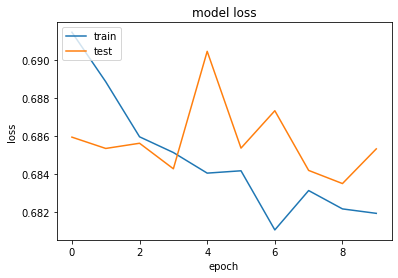

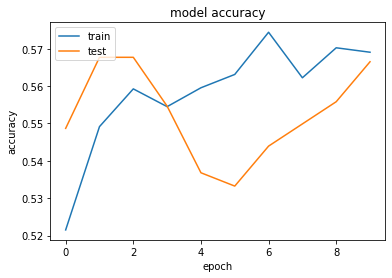

In [544]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [358]:
predictions = model.predict(X_test)
predictions

array([[0.5904704 ],
       [0.5690032 ],
       [0.41643104],
       ...,
       [0.2798969 ],
       [0.41975906],
       [0.5941305 ]], dtype=float32)

In [197]:
y_test

array([1, 0, 1, ..., 0, 1, 1])